In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv("Advertising.csv")

In [67]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [69]:
X = df.drop("sales", axis = 1)
X = X.iloc[:, 1:]
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [70]:
y = df["sales"]
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [71]:
import statsmodels.api as sm

In [72]:
model = sm.OLS(y, X).fit()

In [73]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):                   2.43e-171
Time:                        11:29:30   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=402)

In [133]:
y_train.shape

(160,)

In [134]:
lm = LinearRegression()

In [135]:
reg = lm.fit(X_train,y_train)

In [136]:
reg.score(X_train,y_train)

0.8918099452207627

In [137]:
predict = reg.predict(X_test)

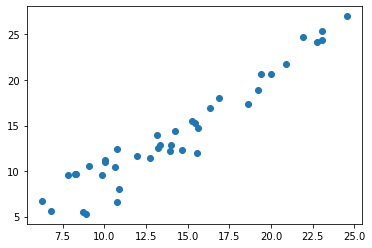

In [138]:
plt.scatter(predict, y_test);

In [139]:
from sklearn.metrics import mean_squared_error


In [146]:
rmse_tahmin =  np.sqrt(mean_squared_error(y_test, predict))

In [147]:
rmse_tahmin

1.741951503642347

In [148]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [149]:
rmse

2.0616395203508904

## validation


In [150]:
from sklearn.model_selection import cross_val_score

In [155]:
cross_val_score(reg, X_train, y_train, cv = 10, scoring = "r2").mean()

0.8673859758294581

In [156]:
np.sqrt(-cross_val_score(reg, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

1.6852348037603093